# Modul 2 Praktikum Analisis Big Data
## Prediksi Saham Menggunakan Twitter Sentiment Analysis

**Program Studi Sains Data**

**Institut Teknologi Sumatera**

Tujuan Praktikum:

1. Memahami bagaimana membangun model prediksi dengan text analisis

2. Menerapkan web scrapping untuk mengakuisisi data text analisis

3. Memahami bagaimana model Twitter Analisis dengan sentiment analisis

# Pre Test

1. Apa yang dimaksud dengan Text Analisis?
2. Bagaimana menerapkan text analisis dengan prediksi analisis?
3. Apa yang dimaksud dengan sentiment analisis?
4. Berikan contoh bagaimana menerapkan prediksi melalui sentiment analisis (buat dalam bagan atau flowchart)

#### Mengimpor library yang diperlukan

In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt

#### Mengimpor library yang digunakan untuk mengambil data dari twitter

In [2]:
import tweepy
import csv
import pandas as pd
import random
import numpy as np
import pandas as pd

#### pengaturan consumer key dan access token

In [3]:
consumer_key    = '3jmA1BqasLHfItBXj3KnAIGFB'
consumer_secret = 'imyEeVTctFZuK62QHmL1I0AUAMudg5HKJDfkx0oR7oFbFinbvA'

access_token  = '265857263-pF1DRxgIcxUbxEEFtLwLODPzD3aMl6d4zOKlMnme'
access_token_secret = 'uUFoOOGeNJfOYD3atlcmPtaxxniXxQzAU4ESJLopA1lbC'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

#### Fetching tweets for United Airlines in extended mode (artinya seluruh tweet akan di scrapping dan bukan hanya beberapa kata + tautan)

In [20]:
fetch_tweets=tweepy.Cursor(api.search_tweets, q="#unitedAIRLINES",count=365, lang ="en",since="2022-01-01", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since


In [21]:
data

,Date,Tweets
0,2023-03-07,RT @CyndiCaBu: Please support @MISS_Elasmo in...
1,2023-03-07,RT @CyndiCaBu: Please support @MISS_Elasmo in...
2,2023-03-07,Caught on video: A #UnitedAirlines passenger a...
3,2023-03-07,RT @diecastryan: A bucket list shot checked of...
4,2023-03-07,RT @diecastryan: A bucket list shot checked of...
...,...,...
492,2023-02-25,Did you fly with United Airlines? Were you on ...
493,2023-02-25,ICAO: #A1D18F\nFlt: #UAL927 #UnitedAirlines #F...
494,2023-02-25,"Our pilots, technicians, and employees look fa..."
495,2023-02-25,RT @MdSaifu57846909: Contact me to get your dr...


#### Membersihkan special character dari setiap tweets

In [22]:
data.to_csv("Tweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
total=100
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    temp_df = pd.DataFrame([[data["Date"].iloc[index], 
                            my_new_string]], columns = ['Date','Tweets'])
    cdata = pd.concat([cdata, temp_df], axis = 0).reset_index(drop = True)
    # index=index+1
#print(cdata.dtypes)

#### Menampilkan data dengan tanggal dan tweet, dapat dilihat ada banyak tweet setiap hari nya. Jadi kita akan menyatukan satu per satu nanti.

In [8]:
cdata

,Date,Tweets
0,2023-03-06,UnitedAirlines Toy Story of Terror 2013 Short ...
1,2023-03-06,UnitedAirlines Mrs Harris Goes to Paris 2022 L...
2,2023-03-06,UnitedAirlines uTalk got to practice basic Fr...
3,2023-03-06,Didnt know that the Aranet4 Co2 readings went ...
4,2023-03-06,New Dashboard Allows Travelers to See Which Ai...
...,...,...
404,2023-02-24,RT AvSourceNews NEWS United Airlines flight U...
405,2023-02-24,Thx Unitedairlines But if U wanna show me appr...
406,2023-02-24,Captain your career with CommuteAirBuilding yo...
407,2023-02-24,Dear united Not really sure but aint someth...


#### Membuat dataframe dimana kita akan mengombinasikan di mana kita akan menggabungkan tanggal tweet dan menyimpannya

In [23]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [24]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        temp_df = pd.DataFrame([[get_date, 
                                get_tweet]], columns = ['Date','Tweets'])
        ccdata = pd.concat([ccdata, temp_df], axis = 0).reset_index(drop = True)
        get_tweet=" "

#### Semua tweet telah digabungkan sesuai tanggalnya.

In [25]:
ccdata

,Date,Tweets
0,2023-03-07,RT CyndiCaBu Please support MISSElasmo in the...
1,2023-03-06,Me flight is delayed Mom oh wow is the weathe...
2,2023-03-05,Ugh One of my least favorite aircraft The low...
3,2023-03-04,Back to the South For a couple days So much n...
4,2023-03-03,When your Instructor Evaluator Specialists pr...
5,2023-03-02,RT n194at United Air LinesDouglas DC871 N8094...
6,2023-03-01,united VirginAustralia The point of equality ...
7,2023-02-28,united VirginAustralia Just another reason I ...
8,2023-02-27,Check out United Super DC8 Inaugural Flight 1...
9,2023-02-26,On way back from skiing vacation thru Dulles ...


#### Nah untuk mengetahui "closing price" setiap harinya kita akan import DATA STOCK HARGA UNITED AIRLINES dari "yahoo.finance". Kita akan mempertimbangkan harga "Closed" saja.

In [26]:
read_stock_p=pd.read_csv('UAL.csv')
# DOWNLOAD UPDATED CLOSE PRICE FROM https://finance.yahoo.com/quote/UAL/history?period1=1598918400&period2=1632268800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
read_stock_p

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-07,36.139999,36.500000,30.870001,31.200001,31.200001,45172400
1,2022-03-08,31.799999,34.240002,30.540001,32.240002,32.240002,34172800
2,2022-03-09,34.439999,36.459999,34.279999,34.900002,34.900002,34309000
3,2022-03-10,33.700001,35.759998,33.049999,35.200001,35.200001,18456400
4,2022-03-11,35.939999,36.139999,34.669998,34.869999,34.869999,15575900
...,...,...,...,...,...,...,...
245,2023-02-27,50.669998,51.520000,50.540001,50.700001,50.700001,4914300
246,2023-02-28,50.599998,52.330002,50.580002,51.959999,51.959999,6279700
247,2023-03-01,51.669998,52.540001,51.520000,52.389999,52.389999,4876100
248,2023-03-02,51.900002,52.610001,51.480000,52.560001,52.560001,3258800


#### Menambahkan kolom "Price" pada dataframe dan mengambil harga saham sesuai tanggal dalam dataframe.

In [27]:
ccdata['Prices']=""

In [28]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            #ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            ccdata['Prices'].iloc[i] = int(read_stock_p.Close[j])

#### Harga diambil tetapi beberapa entri kosong karena harga penutupan mungkin tidak tersedia untuk hari itu karena beberapa alasan (seperti hari libur, dll.)

In [29]:
d = ccdata
d.tail(100)

,Date,Tweets,Prices
0,2023-03-07,RT CyndiCaBu Please support MISSElasmo in the...,
1,2023-03-06,Me flight is delayed Mom oh wow is the weathe...,
2,2023-03-05,Ugh One of my least favorite aircraft The low...,
3,2023-03-04,Back to the South For a couple days So much n...,
4,2023-03-03,When your Instructor Evaluator Specialists pr...,53
5,2023-03-02,RT n194at United Air LinesDouglas DC871 N8094...,52
6,2023-03-01,united VirginAustralia The point of equality ...,52
7,2023-02-28,united VirginAustralia Just another reason I ...,51
8,2023-02-27,Check out United Super DC8 Inaugural Flight 1...,50
9,2023-02-26,On way back from skiing vacation thru Dulles ...,


#### Jadi kita mengambil nilai rata-rata untuk harga penutupan dan memasukkannya ke dalam nilai kosong

In [30]:
mean=0
summ=0
count=0
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]!=""):
        summ=summ+int(ccdata.Prices.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
        ccdata.Prices.iloc[i]=int(mean)

#### Sekarang semua data telah terisi

In [31]:
ccdata

,Date,Tweets,Prices
0,2023-03-07,RT CyndiCaBu Please support MISSElasmo in the...,51
1,2023-03-06,Me flight is delayed Mom oh wow is the weathe...,51
2,2023-03-05,Ugh One of my least favorite aircraft The low...,51
3,2023-03-04,Back to the South For a couple days So much n...,51
4,2023-03-03,When your Instructor Evaluator Specialists pr...,53
5,2023-03-02,RT n194at United Air LinesDouglas DC871 N8094...,52
6,2023-03-01,united VirginAustralia The point of equality ...,52
7,2023-02-28,united VirginAustralia Just another reason I ...,51
8,2023-02-27,Check out United Super DC8 Inaugural Flight 1...,50
9,2023-02-26,On way back from skiing vacation thru Dulles ...,51


#### buat kolom "prices" menjadi integer sehingga operasi matematika dapat digunakan secara mudah.

In [32]:
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

#### Menambahkan 4 kolom baru dalam kerangka data kita sehingga analisis sentimen dapat dilakukan.. Comp adalah "Gabungan" yang akan memberi tahu apakah pernyataan tersebut secara keseluruhan negatif atau positif. Jika bernilai negatif maka bernilai negatif, jika bernilai positif maka bernilai positif. Jika bernilai 0, maka netral.

In [33]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2023-03-07,RT CyndiCaBu Please support MISSElasmo in the...,51,,,,
1,2023-03-06,Me flight is delayed Mom oh wow is the weathe...,51,,,,
2,2023-03-05,Ugh One of my least favorite aircraft The low...,51,,,,
3,2023-03-04,Back to the South For a couple days So much n...,51,,,,
4,2023-03-03,When your Instructor Evaluator Specialists pr...,53,,,,
5,2023-03-02,RT n194at United Air LinesDouglas DC871 N8094...,52,,,,
6,2023-03-01,united VirginAustralia The point of equality ...,52,,,,
7,2023-02-28,united VirginAustralia Just another reason I ...,51,,,,
8,2023-02-27,Check out United Super DC8 Inaugural Flight 1...,50,,,,
9,2023-02-26,On way back from skiing vacation thru Dulles ...,51,,,,


#### Downloading package berikut untuk sentiment analysis.

In [34]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ardik\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### Bagian kode ini bertanggung jawab untuk menetapkan polaritas untuk setiap pernyataan. Itulah seberapa banyak pernyataan positif, negatif, netral. Dan juga menetapkan nilai majemuk yang merupakan sentimen keseluruhan dari pernyataan tersebut.

In [35]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata['Comp'].iloc[indexx] = sentence_sentiment['compound']
        ccdata['Negative'].iloc[indexx] = sentence_sentiment['neg']
        ccdata['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        ccdata['Positive'].iloc[indexx] = sentence_sentiment['compound']
        # ccdata.set_value(indexx, 'Comp', sentence_sentiment['pos'])
        # ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        # ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        # ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print(stocks_dataf.loc[indexx, 'Tweets'])
        print(indexx)

C:\Users\ardik\AppData\Local\Temp\ipykernel_10680\598416434.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for indexx, row in ccdata.T.iteritems():
C:\Users\ardik\AppData\Local\Temp\ipykernel_10680\598416434.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccdata['Comp'].iloc[indexx] = sentence_sentiment['compound']
C:\Users\ardik\AppData\Local\Temp\ipykernel_10680\598416434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccdata['Negative'].iloc[indexx] = sentence_sentiment['neg']
C:\Users\ardik\AppData\Local\Temp\ipykernel_10680\598416434.py:11: Sett

In [36]:
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2023-03-07,RT CyndiCaBu Please support MISSElasmo in the...,51,0.9959,0.11,0.755,0.9959
1,2023-03-06,Me flight is delayed Mom oh wow is the weathe...,51,0.9991,0.079,0.773,0.9991
2,2023-03-05,Ugh One of my least favorite aircraft The low...,51,0.9979,0.041,0.811,0.9979
3,2023-03-04,Back to the South For a couple days So much n...,51,0.9936,0.064,0.817,0.9936
4,2023-03-03,When your Instructor Evaluator Specialists pr...,53,0.9993,0.055,0.767,0.9993
5,2023-03-02,RT n194at United Air LinesDouglas DC871 N8094...,52,0.9999,0.048,0.727,0.9999
6,2023-03-01,united VirginAustralia The point of equality ...,52,0.9997,0.055,0.729,0.9997
7,2023-02-28,united VirginAustralia Just another reason I ...,51,0.9996,0.005,0.741,0.9996
8,2023-02-27,Check out United Super DC8 Inaugural Flight 1...,50,0.9884,0.051,0.828,0.9884
9,2023-02-26,On way back from skiing vacation thru Dulles ...,51,0.888,0.089,0.812,0.888


#### Menghitung persentase tweet positif dan negatif, dan membuat grafik PIE 

% of positive tweets=  100.0
% of negative tweets=  0.0


[]

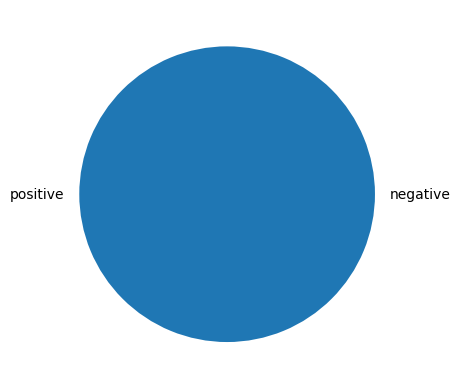

In [37]:
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

#### Membuat kerangka data baru dengan kolom yang diperlukan untuk menggunakan algoritma pembelajaran mesin

In [38]:
df_=ccdata[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()

In [39]:
df_

,Date,Prices,Comp,Negative,Neutral,Positive
0,2023-03-07,51,0.9959,0.11,0.755,0.9959
1,2023-03-06,51,0.9991,0.079,0.773,0.9991
2,2023-03-05,51,0.9979,0.041,0.811,0.9979
3,2023-03-04,51,0.9936,0.064,0.817,0.9936
4,2023-03-03,53,0.9993,0.055,0.767,0.9993
5,2023-03-02,52,0.9999,0.048,0.727,0.9999
6,2023-03-01,52,0.9997,0.055,0.729,0.9997
7,2023-02-28,51,0.9996,0.005,0.741,0.9996
8,2023-02-27,50,0.9884,0.051,0.828,0.9884
9,2023-02-26,51,0.888,0.089,0.812,0.888


#### Bagi dataset menjadi train and test.

In [40]:
train_start_index = '0'
train_end_index = '5'
test_start_index = '6'
test_end_index = '8'
train = df_.loc[train_start_index : train_end_index,:]
test = df_.loc[test_start_index:test_end_index,:]

#### Buat sebuah 2D array yang menyimpan Negative and Positive sentiment untuk Training dataset.

In [41]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

C:\Users\ardik\AppData\Local\Temp\ipykernel_10680\3231284935.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in train.T.iteritems():


In [42]:
print(numpy_df_train)

[[0.11   0.9959]
 [0.079  0.9991]
 [0.041  0.9979]
 [0.064  0.9936]
 [0.055  0.9993]
 [0.048  0.9999]]


#### Buat sebuah 2D array yang menyimpan Negative and Positive sentiment untuk Testing dataset.

In [43]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

C:\Users\ardik\AppData\Local\Temp\ipykernel_10680\1753046139.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for date, row in test.T.iteritems():


In [44]:
print(numpy_df_test)

[[0.055  0.9997]
 [0.005  0.9996]
 [0.051  0.9884]]


#### Buat 2 dataframe untuk Training and Testing "Prices". dapat membuat 1-D array untuk lainnya

In [45]:
y_train = pd.DataFrame(train['Prices'])
#y_train=[91,91,91,92,91,92,91]
y_test = pd.DataFrame(test['Prices'])
print(y_train)

   Prices
0      51
1      51
2      51
3      51
4      53
5      52


#### Menyesuaikan sentimen (sebagai variabel independen) dan harga (sebagai variabel dependen)

In [46]:
# from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

C:\Users\ardik\AppData\Local\Temp\ipykernel_10680\1504975680.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(numpy_df_train, y_train)


RandomForestRegressor()

#### Membuat Prediksi

In [47]:
prediction = rf.predict(numpy_df_test)

In [48]:
print(prediction)

[52.32 52.39 51.32]


#### Importing matplotlib library for plotting graph

In [49]:
import matplotlib.pyplot as plt

#### Definisikan posisi index untuk test data. Membuat kerangka data untuk nilai prediksi.

In [50]:
idx=np.arange(int(test_start_index),int(test_end_index)+1)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])

In [51]:
predictions_df_

,Prices
6,52.32
7,52.39
8,51.32


#### Plotting the graph for the Predicted_price VS Actual Price

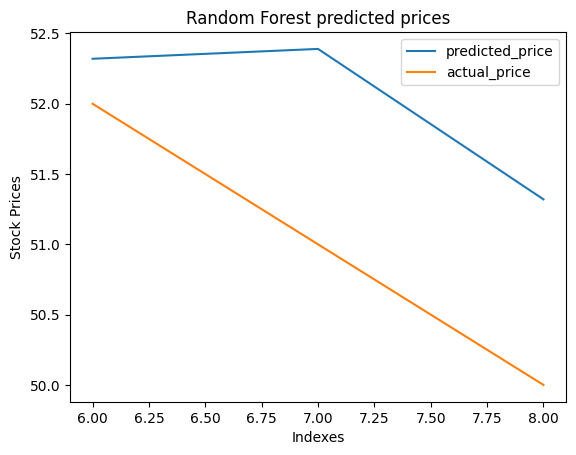

In [52]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")

In [62]:
# from treeinterpreter import treeinterpreter as ti
# from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

LinearRegression()

In [63]:
reg.predict(numpy_df_test)

array([[49.76331769],
       [48.52432257],
       [18.54322743]])

# Tugas Individu

1. Buatlah prediksi saham dalam 1 tahun terkahir pada tahun 2022
2. Lakukan twitter scrapping dengan periode 1 tahun juga di tahun 2022.
3. Lakukan prediksi dengan Linear Regression dan Random Forest (Menerapkan Data Mining dan pembelajaran mesin)
4. Berikan Analisis model prediksi saham yang telah anda bangun. Berapa banyak sentiment yang dihasilkan?

# Tugas Kelompok

Cari lah data saham di yahoo finance lalu unduh dalam periode 15 tahun. dari 2008 hingga 2023. lakukan web scrapping di twitter dengan mengambil data dari 2008 hingga 2023.
Setiap kelompok harus berbeda data sahamnya. Lakukan Analisis dengan menggunakan model Linear regression dan random forest. Buatlah pembahasan setiap kode dan buat lah analisis hasil dan kesimpulan.